In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Aarya\AppData\Local\Temp\ipykernel_17712\3634999861.py:2: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\Steadfast_505H-10_30-11_07.csv')


Detected Anomalies:
                   Time  Inj Gas Meter Volume Instantaneous  Deviation
118 2024-10-30 13:16:00                              0.0000   1.000000
126 2024-10-30 14:16:00                              0.0000   1.000000
127 2024-10-30 15:00:00                              0.0000   1.000000
130 2024-10-30 15:28:00                           1884.0645  -0.046702
536 2024-10-31 10:34:00                              0.0000   1.000000


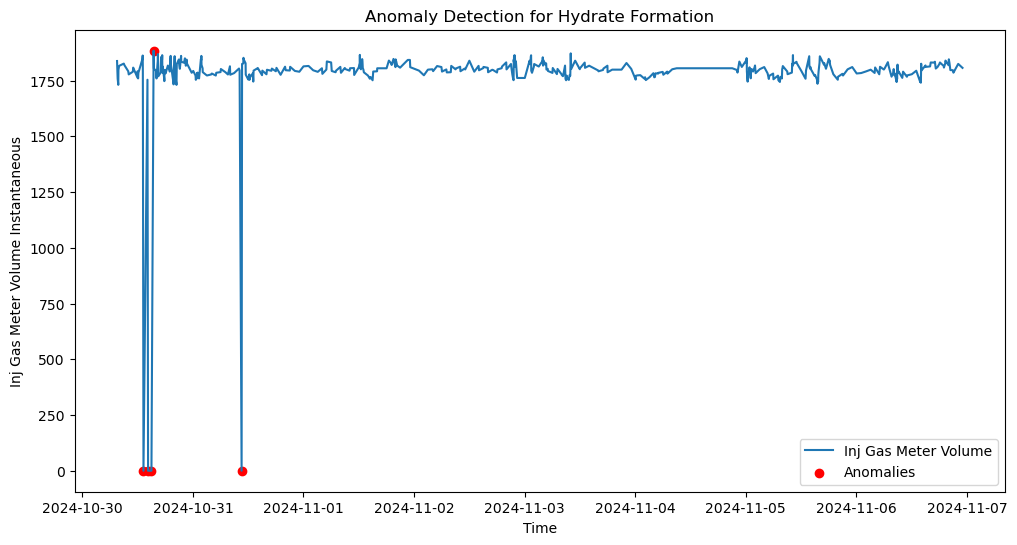

In [ ]:
# Load and preprocess the data
df = pd.read_csv('data\Steadfast_505H-10_30-11_07.csv')
df['Time'] = pd.to_datetime(df['Time'], format='%m/%d/%Y %I:%M:%S %p')

df['Time Difference (minutes)'] = df['Time'].diff().dt.total_seconds() / 60
df['Rate of Change Volume (per minute)'] = df['Inj Gas Meter Volume Instantaneous'].diff(
) / df['Time Difference (minutes)']

df['Deviation'] = (df['Inj Gas Meter Volume Setpoint'] -
                   df['Inj Gas Meter Volume Instantaneous']) / df['Inj Gas Meter Volume Setpoint']

df['Time'] = pd.to_datetime(df['Time'])

features = ['Inj Gas Meter Volume Instantaneous',
            'Inj Gas Valve Percent Open',
            'Rate of Change Volume (per minute)',
            'Deviation']

df = df.dropna(subset=features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

iso_forest = IsolationForest(contamination=0.0085, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_scaled)

# Anomalies are labeled as -1
df['Anomaly'] = df['Anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Filter anomalies
detected_anomalies = df[df['Anomaly'] == 1]

# Print the anomalies
print("Detected Anomalies:")
print(detected_anomalies[['Time', 'Inj Gas Meter Volume Instantaneous',
       'Deviation']])

# Optionally, save the anomalies to a CSV file
detected_anomalies.to_csv('detected_anomalies.csv', index=False)

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df['Time'], df['Inj Gas Meter Volume Instantaneous'],
         label='Inj Gas Meter Volume')
plt.scatter(df['Time'][df['Anomaly'] == 1],
            df['Inj Gas Meter Volume Instantaneous'][df['Anomaly'] == 1],
            color='red', label='Anomalies')
plt.xlabel('Time')
plt.ylabel('Inj Gas Meter Volume Instantaneous')
plt.title('Anomaly Detection for Hydrate Formation')
plt.legend()
plt.show()